In [13]:
 # Подгрузим пакеты 
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt  #Пакет для построения графиков и прочего
import seaborn as sns

# Задания для самостоятельного решения

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

**Замечание: 2** Для зачета уже достаточно половины абсолютно верно решенных заданий. 

Если возникают сложности по ходу решения - пиште свой вопрос в общий чат в Slack. Там всегда подскажут) 




<div class="alert alert-info">
<b>Задание № 1 (Обязательно)</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

* Н0: Нулевая гипотеза предполагает, что разница между препаратами незначительна.
* Н1: Альтернативная гипотеза предполагает наличие существенной разницы между препаратами А и В.

In [14]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

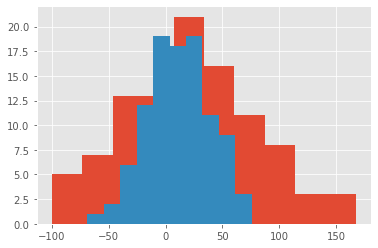

In [38]:
plt.hist(B, bins=10);
plt.hist(A, bins=10);

In [ ]:
#  Так как имеем нормальное распределение данных и две зависимые группы, 
# проверим гипотезы с помощью парного T-test для зависимых выборок

In [35]:
 tvalue, pvalue = ttest_rel(A, B)
print(f't-value={tvalue:.4f}, p-value={pvalue:.6f} \n')

alpha = 0.05
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу, есть различия в эффективности препаратов')
else:
    print('Не отвергаем нулевую гипотезу, разница между препаратами незначительна')

t-value=-2.1702, p-value=0.032386 

Отвергаем нулевую гипотезу, есть различия в эффективности препаратов


<div class="alert alert-info">
<b>Задание № 2 (Обязательно)</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [33]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)


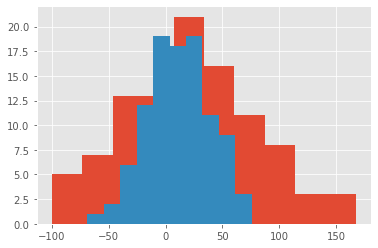

In [66]:
plt.hist(B, bins=10);
plt.hist(A, bins=10);

In [ ]:
# Проверим гипотезу с помощью теста Вилкоксона для зависимых выборок

In [36]:
from scipy.stats import wilcoxon  # Wilcoxon signed-rank test

stat, p = wilcoxon(A, B)
print(f'Statistics={stat:.2f}, p-value={pvalue:.6f} \n')

alpha = 0.05
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу, есть различия в эффективности препаратов')
else:
    print('Не отвергаем нулевую гипотезу, разница между препаратами незначительна')

Statistics=1930.00, p-value=0.032386 

Отвергаем нулевую гипотезу, есть различия в эффективности препаратов


<div class="alert alert-info">
<b>Задание № 3 (Обязательно)</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

* Н0: Нулевая гипотеза предполагает, что разницы между удобрением и менералкой нет.
* Н1: Альтернативная гипотеза предполагает наличие эффекта от удобрения по сравнению с минералкой.

In [132]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [138]:
import statistics
x = statistics.stdev(mineral)
x

1.2891488517253398

In [ ]:
# Проверим гипотезу с помощью теста Дисперсионного анализа ANOVA 

In [42]:
from scipy.stats import f_oneway 

# импортирем функцию для дисперсионного анализа из библиотеки scipy пакета stats

stat, pvalue = f_oneway(water, nutri, mineral)  

print(f'Statistics={stat:.2f}, p-value={pvalue:.6f} \n')

alpha = 0.05
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Statistics=12.53, p-value=0.000029 

Отвергаем нулевую гипотезу


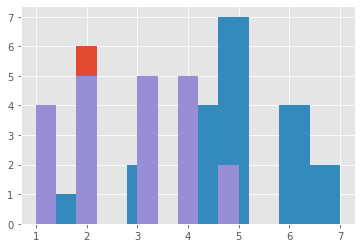

In [45]:
plt.hist(water)
plt.hist(nutri)
plt.hist(mineral)
plt.show()

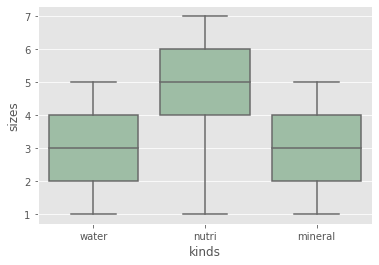

In [46]:
import seaborn as sns 
 
sizes = water + nutri + mineral
kinds = ['water']*len(water) + ['nutri']*len(nutri)+['mineral']*len(mineral)
df_mid = pd.DataFrame()
df_mid['sizes'] = sizes
df_mid['kinds'] = kinds


ax = sns.boxplot(x='kinds', y='sizes', data=df_mid, color='#99c2a2')
#ax = sns.swarmplot(x="kinds", y="sizes", data=df_mid, color='#7d0013')
plt.show()

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [245]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()

 
#Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
#что они имеют одинаковую значимость.

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [178]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        800 non-null    int64 
 1   Name       799 non-null    object
 2   Class 1    800 non-null    object
 3   Class 2    414 non-null    object
 4   HP         800 non-null    int64 
 5   Attack     800 non-null    int64 
 6   Defense    800 non-null    int64 
 7   Sp. Atk    800 non-null    int64 
 8   Sp. Def    800 non-null    int64 
 9   Speed      800 non-null    int64 
 10  Legendary  800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


# Задачи

<div class="alert alert-info">
<b>Задание № 1 (Обязательно):</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


* Н0: Нулевая гипотеза предполагает, что покемоны в классе grass имеют более сильную обычную атаку, чем у покемонов в классе rock.
* Н1: Альтернативная гипотеза предполагает, что покемоны в классе grass имеют более слабую обычную атаку, чем у покемонов в классе rock.

In [125]:
aa = pokemon.drop(pokemon[(pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] == 'Rock') | (pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] == 'Grass')].index)
aa

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


In [126]:
grass = aa[( ((aa['Class 1'] == 'Grass') | (aa['Class 2'] == 'Grass'))  )]
grass.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,428.956989,65.838710,73.731183,72.956989,72.978495,70.956989,61.311828
std,242.327658,18.950904,24.179645,25.033419,26.512089,20.517179,27.334076
min,1.000000,30.000000,27.000000,30.000000,24.000000,30.000000,10.000000
25%,208.000000,50.000000,59.000000,55.000000,54.000000,55.000000,40.000000
50%,459.000000,61.000000,70.000000,70.000000,65.000000,70.000000,56.000000
75%,610.000000,75.000000,95.000000,85.000000,90.000000,82.000000,80.000000
max,788.000000,123.000000,132.000000,131.000000,145.000000,129.000000,145.000000


In [120]:
rock = aa[( ((aa['Class 1'] == 'Rock') | (aa['Class 2'] == 'Rock')))]
rock.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,422.285714,65.660714,91.785714,107.803571,60.017857,72.982143,51.750000
std,229.699781,22.086834,34.805284,38.823339,27.100145,37.082459,28.347358
min,81.000000,20.000000,10.000000,40.000000,10.000000,25.000000,5.000000
25%,236.250000,50.000000,63.000000,85.000000,45.000000,45.000000,31.500000
50%,393.000000,68.500000,92.500000,105.000000,55.000000,65.000000,49.000000
75%,621.500000,80.000000,116.250000,130.000000,70.500000,86.500000,62.750000
max,797.000000,123.000000,165.000000,230.000000,160.000000,230.000000,150.000000


In [128]:
tvalue, pvalue = stats.ttest_ind(grass['Attack'], rock['Attack'])
print(f't-value={tvalue:.4f}, p-value={pvalue:.4f} \n')

alpha = 0.05
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу, покемоны grass имеют более слабую обычную атаку, чем у покемоны rock')
else:
    print('Не отвергаем нулевую гипотезу, покемоны grass имеют более сильную обычную атаку, чем у покемоны rock')

t-value=-3.7295, p-value=0.0003 

Отвергаем нулевую гипотезу, покемоны grass имеют более слабую обычную атаку, чем у покемоны rock


In [141]:
stat, pvalue = f_oneway(grass['Attack'], rock['Attack'])

print(f'f-value={stat:.4f}, p-value={pvalue:.4f} \n')

alpha = 0.05
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу, покемоны grass имеют более слабую обычную атаку, чем у покемоны rock')
else:
    print('Не отвергаем нулевую гипотезу, покемоны grass имеют более сильную обычную атаку, чем у покемоны rock')

f-value=13.9089, p-value=0.0003 

Отвергаем нулевую гипотезу, покемоны grass имеют более слабую обычную атаку, чем у покемоны rock


In [ ]:
# Чем больше F, тем проще различить выборки

<div class="alert alert-info">
<b>Задание № 2 (Обязательно):</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

* Н0: Нулевая гипотеза предполагает, что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`.
* Н1: Альтернативная гипотеза предполагает, что покемоны в классе `Water` в среднем медленее, чем покемоны в классе `Normal`.

In [143]:
wn = pokemon.drop(pokemon[(pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] == 'Normal') | (pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] == 'Water')].index)
wn

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


In [160]:
water = wn[(((wn['Class 1'] == 'Water') | (wn['Class 2'] == 'Water')))].Speed
water.describe()

count    125.00000
mean      64.93600
std       22.74889
min       15.00000
25%       50.00000
50%       65.00000
75%       81.00000
max      122.00000
Name: Speed, dtype: float64

In [161]:
normal = wn[(((wn['Class 1'] == 'Normal') | (wn['Class 2'] == 'Normal')))].Speed
normal.describe()

count    101.000000
mean      72.257426
std       28.427330
min        5.000000
25%       50.000000
50%       72.000000
75%       93.000000
max      135.000000
Name: Speed, dtype: float64

In [162]:
 tvalue, pvalue = stats.ttest_ind(water, normal)
print(f't-value={tvalue:.4f}, p-value={pvalue:.4f} \n')

alpha = 0.05
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу, покемоны в классе Water в среднем медленее, чем покемоны в классе Normal')
else:
    print('Не отвергаем нулевую гипотезу, покемоны в классе Water в среднем более быстрые, чем покемоны в классе Normal')

t-value=-2.1509, p-value=0.0326 

Отвергаем нулевую гипотезу, покемоны в классе Water в среднем медленее, чем покемоны в классе Normal


In [163]:
 stat, pvalue = f_oneway(water, normal)

print(f'f-value={stat:.4f}, p-value={pvalue:.4f} \n')

f-value=4.6264, p-value=0.0326 



<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

* Н0: Нулевая гипотеза предполагает, что сыворотка не работает.
* Н1: Альтернативная гипотеза предполагает, что сыворотка работает.

In [152]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [170]:
threathed_speed = pokemon[pokemon.Name.isin(treathed_pokemon)].Speed
threathed_speed.describe()

count      4.000000
mean     145.000000
std        7.071068
min      135.000000
25%      142.500000
50%      147.500000
75%      150.000000
max      150.000000
Name: Speed, dtype: float64

In [165]:
# Покемоны, которые НЕ  принимали сыворотку увеличения скорости
non_threathed_speed = pokemon[~pokemon['Name'].isin(treathed_pokemon)].Speed
non_threathed_speed.describe()

count    796.000000
mean      67.891960
std       28.614785
min        5.000000
25%       45.000000
50%       65.000000
75%       90.000000
max      180.000000
Name: Speed, dtype: float64

In [175]:
tvalue, pvalue = stats.ttest_ind(threathed_speed, non_threathed_speed)
print(f't-value={tvalue:.4f}, p-value={pvalue:.6f} \n')

alpha = 0.05
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу, что сыворотка работает')
else:
    print('Не отвергаем нулевую гипотезу, что сыворотка не работает')

t-value=5.3854, p-value=0.000000 

Отвергаем нулевую гипотезу, что сыворотка работает


In [172]:
stat, pvalue = f_oneway(threathed_speed, non_threathed_speed)

print(f'f-value={stat:.4f}, p-value={pvalue:.4f} \n')

f-value=29.0026, p-value=0.0000 



<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
#  Задание 4 идентично заданию 3.

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [275]:
pd.options.mode.chained_assignment = None

pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [276]:
ordinary = pokemon[(pokemon['Legendary'] == False)]
ordinary

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
787,788,Gourgeist Super Size,Ghost,Grass,85,100,122,58,75,54,False
788,789,Bergmite,Ice,NaN,55,69,85,32,35,28,False
789,790,Avalugg,Ice,NaN,95,117,184,44,46,28,False
790,791,Noibat,Flying,Dragon,40,30,35,45,40,55,False


In [285]:
# ordinary

In [284]:
ordinary['total_sum'] = ordinary[['HP','Attack', 'Defense']].sum(axis=1)
ordinary['total_mul'] = ordinary[['HP','Attack', 'Defense']].product(axis=1)
ordinary

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,total,total_sum,total_mul
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,134,87204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,788,Gourgeist Super Size,Ghost,Grass,85,100,122,58,75,54,False,307,307,1037000
788,789,Bergmite,Ice,NaN,55,69,85,32,35,28,False,209,209,322575
789,790,Avalugg,Ice,NaN,95,117,184,44,46,28,False,396,396,2045160
790,791,Noibat,Flying,Dragon,40,30,35,45,40,55,False,105,105,42000


In [286]:
legendary = pokemon[pokemon['Legendary'] == True]
legendary

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
156,157,Articuno,Ice,Flying,90,85,100,95,125,85,True
157,158,Zapdos,Electric,Flying,90,90,85,125,90,100,True
158,159,Moltres,Fire,Flying,90,100,90,125,85,90,True
162,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


In [288]:
legendary['total_sum'] = legendary[['HP','Attack', 'Defense']].sum(axis=1)
legendary['total_mul'] = legendary[['HP','Attack', 'Defense']].product(axis=1)
legendary

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,total_sum,total_mul
156,157,Articuno,Ice,Flying,90,85,100,95,125,85,True,275,765000
157,158,Zapdos,Electric,Flying,90,90,85,125,90,100,True,265,688500
158,159,Moltres,Fire,Flying,90,100,90,125,85,90,True,280,810000
162,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True,306,1049400
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True,396,2014000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,300,750000
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True,320,880000
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True,250,528000
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True,300,768000


In [319]:
legendary[['total_sum', 'total_mul']].describe()


,total_sum,total_mul
count,65.000000,6.500000e+01
mean,309.076923,1.085942e+06
std,46.429822,5.169911e+05
min,230.000000,1.800000e+05
25%,275.000000,6.885000e+05
50%,305.000000,1.000000e+06
75%,340.000000,1.350000e+06
max,440.000000,2.880000e+06


In [320]:
ordinary[['total_sum', 'total_mul']].describe()

,total_sum,total_mul
count,735.000000,7.350000e+02
mean,214.410884,4.250414e+05
std,64.359599,3.713542e+05
min,55.000000,2.500000e+03
25%,165.000000,1.512250e+05
50%,213.000000,3.315000e+05
75%,258.000000,5.735375e+05
max,440.000000,2.460000e+06


* <span style="color:blue">Н0: Нулевая гипотеза предполагает, что cумма характеристик HP, Attack, Defense у легендарных покемонов выше, чем у других покемонов.</span>
* <span style="color:blue">Н1: Альтернативная гипотеза предполагает, что cумма характеристик HP, Attack, Defense у простых покемонов выше, чем у легендарных покемонов.</span>

In [291]:
tvalue, pvalue = stats.ttest_ind(legendary['total_sum'], ordinary['total_sum'])
print(f't-value={tvalue:.4f}, p-value={pvalue:.6f} \n')

alpha = 0.05

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу, cумма характеристик у простых покемонов выше, чем у легендарных покемонов')
else:
    print('Не отвергаем нулевую гипотезу, cумма характеристик у легендарных покемонов выше, чем у других покемонов')

t-value=-11.5919, p-value=0.000000 

Отвергаем нулевую гипотезу, cумма характеристик у простых покемонов выше, чем у легендарных покемонов


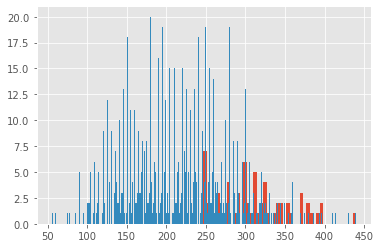

In [349]:
plt.hist(legendary['total_sum'], bins=50 )
plt.hist(ordinary['total_sum'], bins=300 )
plt.show()

* <span style="color:blue">Н0: Нулевая гипотеза предполагает, что произведение характеристик HP, Attack, Defense у легендарных покемонов выше, чем у других покемонов.</span>
* <span style="color:blue">Н1: Альтернативная гипотеза предполагает, что произведение характеристик HP, Attack, Defense у простых покемонов выше, чем у легендарных покемонов.</span>

In [326]:
tvalue, pvalue = stats.ttest_ind(legendary['total_mul'], ordinary['total_mul'] )
print(f't-value={tvalue:.4f}, p-value={pvalue:.6f} \n')

alpha = 0.05

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу, произведение характеристик у простых покемонов выше, чем у легендарных покемонов')
else:
    print('Не отвергаем нулевую гипотезу, произведение характеристик у легендарных покемонов выше, чем у других покемонов')

t-value=13.2633, p-value=0.000000 

Отвергаем нулевую гипотезу, произведение характеристик у простых покемонов выше, чем у легендарных покемонов


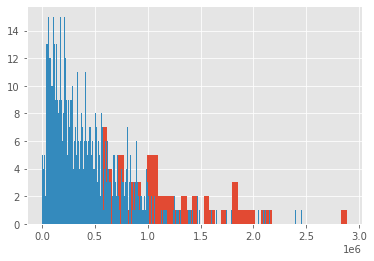

In [339]:
plt.hist(legendary['total_mul'], bins=50 )
plt.hist(ordinary['total_mul'], bins=300 )
plt.show()

In [351]:
# если посмотреть на график, то видно что распределение не нормальное 
# попробуем расчитать критерий Манна-Уитни 

stat, pvalue = mannwhitneyu(legendary['total_mul'], ordinary['total_mul'])
print(f'Statistics={stat:.4f}, p-value={pvalue:.6f} \n')

alpha = 0.05

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу, cумма характеристик у простых покемонов выше, чем у легендарных покемонов')
else:
    print('Не отвергаем нулевую гипотезу, cумма характеристик у легендарных покемонов выше, чем у других покемонов')

Statistics=5741.5000, p-value=0.000000 

Отвергаем нулевую гипотезу, cумма характеристик у простых покемонов выше, чем у легендарных покемонов


In [359]:
stat, pvalue = f_oneway(legendary['total_mul'], ordinary['total_mul'])

print(f'f-value={stat:.4f}, p-value={pvalue:.4f} \n')

f-value=175.9139, p-value=0.0000 



In [ ]:
# каждый из тестов указывает на то, что мы отвергаем нулевую гипотезу

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [29]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [385]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)
pokemon.head(85)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
80,81,Geodude,Rock,Ground,40,80,100,30,30,20,False
81,82,Graveler,Rock,Ground,55,95,115,45,45,35,False
82,83,Golem,Rock,Ground,80,120,130,55,65,45,False
83,84,Ponyta,Fire,NaN,50,85,55,65,65,90,False


* <span style="color:blue">Н0: Нулевая гипотеза предполагает, что классы покемонов 'best_defence_class' не отличаются по уровню защиты.</span>
* <span style="color:blue">Н1: Альтернативная гипотеза предполагает, что классы покемонов 'best_defence_class' отличаются по уровню защиты.</span>

In [386]:
rock = pokemon[((pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock'))].Defense

In [387]:
ground = pokemon[((pokemon['Class 1'] == 'Ground') | (pokemon['Class 2'] == 'Ground'))].Defense

In [388]:
steel = pokemon[((pokemon['Class 1'] == 'Steel') | (pokemon['Class 2'] == 'Steel'))].Defense

In [389]:
ice = pokemon[((pokemon['Class 1'] == 'Ice') | (pokemon['Class 2'] == 'Ice'))].Defense

In [390]:
fvalue, pvalue = stats.f_oneway(rock, ground, steel, ice)
print(f'f-value={fvalue:.2f}, p-value={pvalue:.6f} \n')

alpha = 0.05
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу, классы покемонов "best_defence_class" отличаются по уровню защиты')
else:
    print('Не отвергаем нулевую гипотезу, классы покемонов "best_defence_class" не отличаются по уровню защиты')

f-value=10.82, p-value=0.000001 

Отвергаем нулевую гипотезу, классы покемонов "best_defence_class" отличаются по уровню защиты


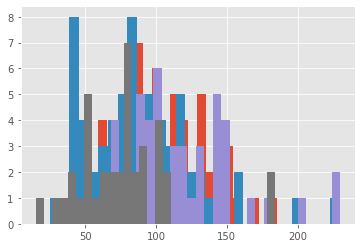

In [391]:
plt.hist(rock, bins=30 )
plt.hist(ground, bins=30 )
plt.hist(steel, bins=30 )
plt.hist(ice, bins=30 )
plt.show()